In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
def i2kl_col(i, N):
    i = np.asarray(i)
    assert i.dtype.kind is 'i', 'i must be integer'
    assert isinstance(N, int), 'N must be integer'
    l = np.ceil(i/N).astype(int)
    k = i - (l - 1)*N
    return k, l

def kl2i_col(k, l, N):
    k = np.asarray(k)
    l = np.asarray(l)
    assert k.dtype.kind is 'i', 'k must be integer'
    assert l.dtype.kind is 'i', 'l must be integer'
    assert isinstance(N, int), 'N must be integer'
    i = (l - 1)*N + k
    return i

In [3]:
def i2kl_row(i, N):
    i = np.asarray(i)
    assert i.dtype.kind is 'i', 'i must be integer'
    assert isinstance(N, int), 'N must be integer'
    k = np.ceil(i/N).astype(int)
    l = i - (k - 1)*N
    return k, l

def kl2i_row(k, l, N):
    k = np.asarray(k)
    l = np.asarray(l)
    assert k.dtype.kind is 'i', 'k must be integer'
    assert l.dtype.kind is 'i', 'l must be integer'
    assert isinstance(N, int), 'N must be integer'
    i = (k - 1)*N + l
    return i

In [4]:
def Delta_ij(Nx, Ny, order='col'):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'
    assert order in ['col', 'row'], 'order must be "col" or "row"'

    j, i = np.meshgrid(np.arange(1, Nx*Ny+1), 
                   np.arange(1, Nx*Ny+1))

    if order == 'col':
        Dij = np.ceil(i/Nx) - np.ceil(j/Nx)
    else:
        Dij = np.ceil(i/Ny) - np.ceil(j/Ny)

    return i, j, Dij.astype(int)

In [5]:
def alphaij(Nx, Ny, order='col'):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'
    assert order in ['col', 'row'], 'order must be "col" or "row"'

    i, j, Dij = Delta_ij(Nx=Nx, Ny=Ny, order=order)

    if order == 'col':
        result = i - j - Dij*Nx
    else:
        result = Dij

    return result

In [6]:
def betaij(Nx, Ny, order='col'):
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    assert (Nx > 0) and (Ny > 0), 'Nx and Ny must be positive'
    assert order in ['col', 'row'], 'order must be "col" or "row"'

    i, j, Dij = Delta_ij(Nx=Nx, Ny=Ny, order=order)

    if order == 'col':
        result = Dij
    else:
        result = i - j - Dij*Ny

    return result

In [7]:
def indexed_grid(Nx, Ny, cmap='viridis'):
    
    assert isinstance(Nx, int), 'Nx must be integer'
    assert isinstance(Ny, int), 'Ny must be integer'
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.5, wspace=0.5)

    data = np.arange(1, Nx*Ny + 1)
    
    data_col = data.reshape((Ny, Nx)).T[::-1]
    data_row = data.reshape((Nx, Ny))[::-1]

    k = np.arange(1, Nx+1)[::-1]
    l = np.arange(1, Ny+1)

    for d, ax in zip([data_col, data_row], axs.flat):

        # Plot the grid as a colormap
        im = ax.imshow(d, cmap=cmap)

        # Set the formatter
        valfmt = tck.StrMethodFormatter("{x:3d}")

        # Loop over the data and create a `Text` for each "pixel".
        for i in range(d.shape[0]):
            for j in range(d.shape[1]):
                im.axes.text(j, i, valfmt(d[i, j], None), color='k', fontsize=14, 
                             horizontalalignment="center", verticalalignment="center")

        # set the ticks
        ax.set_xticks(np.arange(d.shape[1]))
        ax.set_yticks(np.arange(d.shape[0]))

        # Set the labels
        ax.set_xticklabels(l, fontsize=12)
        ax.set_yticklabels(k, fontsize=12)
        ax.set_xlabel('index l', fontsize=16)
        ax.set_ylabel('index k', fontsize=16)

        ax.set_xticks(np.arange(d.shape[1]+1)-.5, minor=True)
        ax.set_yticks(np.arange(d.shape[0]+1)-.5, minor=True)
        ax.tick_params(which="minor", bottom=False, left=False)
        ax.grid(which="minor", color="k", linestyle='-', linewidth=3)

    fig.tight_layout()
    plt.show()

In [8]:
def plot_grid(data, cmap='seismic'):
    bounds = np.array([i for i in np.arange(np.min(data)-0.5, np.max(data)+1.5, 1)])
    ticks_place = bounds+0.5
    fig, ax = plt.subplots()
    cax = ax.matshow(data, cmap=plt.get_cmap(cmap))
    cbar = fig.colorbar(cax, boundaries=bounds, ticks=ticks_place)
    plt.show()

## Examples of indexed grid

Consider a regular grid of $N_{x} \times N_{y}$ observation points $(x_{i}, y_{i}, z_{i})$, $i = 1, \dots, N = N_{x} \, N_{y}$. The indices $i$ may be defined along the $x$- or $y$-axis, according to the Figure A1.

In [9]:
Nx = 4
Ny = 3

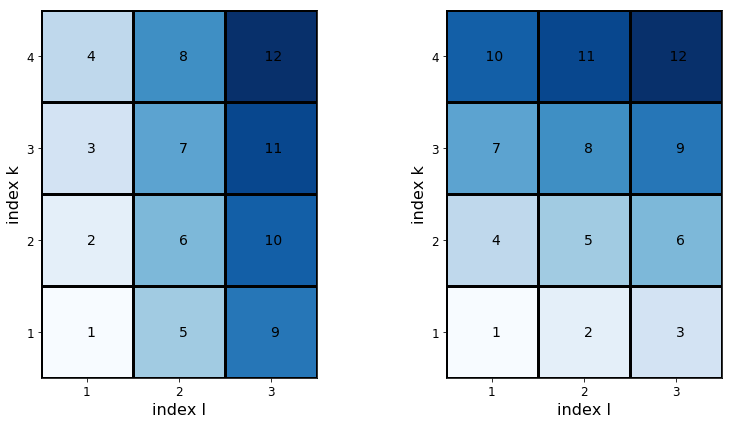

In [10]:
indexed_grid(Nx, Ny, cmap='Blues')

<a id='fig1'></a>

**Figure A1:** Schematic representation of two regular grids of $N_{x} \times N_{y}$ observation points $(x_{i}, y_{i})$, $i = 1, \dots, N = N_{x} \, N_{y}$, with $N_{x} = 4$ and $N_{y} = 3$. These coordinates are conveniently called observation coordinates. The grid indices $k$ and $l$ define the grid coordinates $x_{k}$ and $y_{l}$, respectively. The numbers inside the colored squares represent the observation index $i$. The left panel shows an $x$-oriented grid. The right panel shows an $y$-oriented grid. For both grids, the point $(x_{1}, y_{1})$ is located at the lower-left corner.

## Structure of matrix $\mathbf{A}$

Let us consider that $z_{i} = z_{1}$, $\forall \, i$, where $z_{1} < z_{0}$. As a consequence, the elements $a_{ij}$ of matrix $\mathbf{A}$ may be conveniently rewritten as follows:

<a id='aij-Dz'></a>

$$
a_{ij} = c_{g} \, G \, \Delta z \, \frac{1}{\left[ \left( x_{i} - x_{j} \right)^{2} + \left( y_{i} - y_{j} \right)^{2} + \Delta z^{2} \right]^{\frac{3}{2}}} \: , \tag{A1}
$$

where $\Delta z = z_{0} - z_{1}$. 

It is evident from [equation A1](#aij-Dz) that $r_{ij} = r_{ji}$ and that, consequently, matrix $\mathbf{A}$ is symmetric. Another less-evident property is that $\mathbf{A}$ is formed by blocks and each block is a symmetric Toeplitz matrix. This kind of matrix is commonly called Block-Toeplitz Toeplitz-Block, or simply BTTB. To show this well-defined structure, it is useful to rewrite $a_{ij}$ ([equation A1](#aij-Dz)) in terms of the following *grid coordinates*:

<a id='xk'></a>

$$
x_{k} = x_{1} + (k - 1) \, \Delta x \: , \quad k = 1, \dots, Nx_{x} \: , \tag{A2}
$$

and

<a id='yl'></a>

$$
y_{l} = y_{1} + (l - 1) \, \Delta y \: , \quad l = 1, \dots, N_{y} \: . \tag{A3}
$$ 

The elements $a_{ij}$ ([equation A1](#aij-Dz)) are defined in terms of the coordinates $(x_{i}, y_{i})$ and $(x_{j}, y_{j})$ associated with to the observation points and the equivalent sources, respectively. For convenience, we call these coordinates as *observation coordinates*. To define $a_{ij}$ in terms of $x_{k}$ ([equation A2](#xk)) and $y_{l}$ ([equation A3](#yl)), we need first define the relationship between the *observation indices* $i$ and $j$ and the *grid indices* $k$ and $l$. Here, we investigate two possible situations shown in [Figure A1](#fig1): $x$-oriented grids and $y$-oriented grids.

## Coordinates and indices for $x$-oriented grids

From [Figure A1](#fig1) (left panel), we can see that

<a id='kl2i-column-oriented'></a>

$$
i = (l - 1) \, N_{x} + k \quad , \tag{A4}
$$

<a id='i2l-column-oriented'></a>

$$
l = \Bigg\lceil \frac{i}{N_{x}} \Bigg\rceil \tag{A5}
$$

and, consequently,

<a id='i2k-column-oriented'></a>

$$
k = i - \Bigg\lceil \frac{i}{N_{x}} \Bigg\rceil N_{x} - N_{x} \quad , \tag{A6}
$$

where $\lceil \cdot \rceil$ represents the *ceiling function* (Graham et al., 1994, p. 67). Equations [A4](#kl2i-column-oriented), [A5](#i2l-column-oriented) and [A6](#i2k-column-oriented) show that, for an observation index $i$, there is a unique pair of grid indices $(k, l)$ and vice versa. The same equations can be used for the index $j$ instead of $i$.

By substituting the grid indices $l$ ([equation A5](#i2l-column-oriented)) and $k$ ([equation A6](#i2k-column-oriented)) into the grid coordinates $x_{k}$ ([equation A2](#xk)) and $y_{l}$ ([equation A3](#yl)), we convert them into observation coordinates $x_{i}$ and $y_{i}$ (or $x_{j}$ and $y_{j}$), as follows:

<a id='xi-column-oriented'></a>

$$
x_{i} = x_{1} + \left( i - \Bigg\lceil \frac{i}{N_{x}} \Bigg\rceil N_{x} - N_{x} - 1 \right) \Delta x \tag{A7}
$$

and

<a id='yi-column-oriented'></a>

$$
y_{i} = y_{1} + \left( \Bigg\lceil \frac{i}{N_{x}} \Bigg\rceil - 1 \right) \Delta y \quad . \tag{A8}
$$

## Coordinates and indices for $y$-oriented grids

From [Figure A1](#fig1) (right panel), we can see that the relationships between the observation index $i$ (or $j$) and the grid indices $k$ and $l$ are given by:

<a id='kl2i-row-oriented'></a>

$$
i = (k - 1) \, N_{y} + l \quad , \tag{A9}
$$

<a id='i2k-row-oriented'></a>

$$
k = \Bigg\lceil \frac{i}{N_{y}} \Bigg\rceil \tag{A10}
$$

and, consequently,

<a id='i2l-row-oriented'></a>

$$
l = i - \Bigg\lceil \frac{i}{N_{y}} \Bigg\rceil N_{x} - N_{x} \quad . \tag{A11}
$$

By substituting these grid indices (equations [A10](#i2k-row-oriented) and [A11](#i2l-row-oriented)) into the grid coordinates $x_{k}$ ([equation A2](#xk)) and $y_{l}$ ([equation A3](#yl)), we obtain the following expressions for the observation coordinates $x_{i}$ and $y_{i}$ (or $x_{j}$ and $y_{j}$):

<a id='xi-row-oriented'></a>

$$
x_{i} = x_{1} + \left( \Bigg\lceil \frac{i}{N_{y}} \Bigg\rceil - 1 \right) \Delta x \tag{A12}
$$

and

<a id='yi-row-oriented'></a>

$$
y_{i} = y_{1} + \left( i - \Bigg\lceil \frac{i}{N_{y}} \Bigg\rceil N_{y} - N_{y} - 1 \right) \Delta y \quad . \tag{A13}
$$

## $a_{ij}$ for $x$- and $y$-oriented grids

To write $a_{ij}$ ([equation A1](#aij-Dz)) in terms of the grid coordinates $x_{k}$ ([equation A2](#xk)) and $y_{l}$ ([equation A3](#yl)), let's first use equations [A7](#xi-column-oriented) and [A8](#yi-column-oriented) to compute the differences $(x_{i} - x_{j})$ and $(y_{i} - y_{j})$ for $x$-oriented grids,

<a id='xi-xj-column-oriented'></a>

$$
x_{i} - x_{j} = \alpha_{ij}^{(x)} \, \Delta x \quad , \tag{A14}
$$

<a id='yi-yj-column-oriented'></a>

$$
y_{i} - y_{j} = \beta_{ij}^{(x)} \, \Delta y \tag{A15}
$$

and use equations [A12](#xi-row-oriented) and [A13](#yi-row-oriented) to compute the differences $(x_{i} - x_{j})$ and $(y_{i} - y_{j})$ for $y$-oriented grids,

<a id='xi-xj-row-oriented'></a>

$$
x_{i} - x_{j} = \alpha_{ij}^{(y)} \Delta x \quad , \tag{A16}
$$

<a id='yi-yj-row-oriented'></a>

$$
y_{i} - y_{j} = \beta_{ij}^{(y)} \, \Delta y \quad , \tag{A17}
$$

where

<a id='alphaij-column-oriented'></a>

$$
\alpha_{ij}^{(x)} = (i - j) - \Delta_{ij}^{(x)} \, N_{x} \quad , \tag{A18}
$$

<a id='betaij-column-oriented'></a>

$$
\beta_{ij}^{(x)} = \Delta_{ij}^{(x)} \quad , \tag{A19}
$$

<a id='alphaij-row-oriented'></a>

$$
\alpha_{ij}^{(y)} = \Delta_{ij}^{(y)} \quad , \tag{A20}
$$

<a id='betaij-row-oriented'></a>

$$
\beta_{ij}^{(y)} = (i - j) - \Delta_{ij}^{(y)} \, N_{y} \quad , \tag{A21}
$$

<a id='Dij-column-oriented'></a>

$$
\Delta_{ij}^{(x)} = \Bigg\lceil \frac{i}{N_{x}} \Bigg\rceil - \Bigg\lceil \frac{j}{N_{x}} \Bigg\rceil \tag{A22}
$$

and

<a id='Dij-row-oriented'></a>

$$
\Delta_{ij}^{(y)} = \Bigg\lceil \frac{i}{N_{y}} \Bigg\rceil - \Bigg\lceil \frac{j}{N_{y}} \Bigg\rceil \quad . \tag{A23}
$$

Now, we can define the elements $a_{ij} \equiv a_{ij}^{(x)}$ for column-oriented grids as follows:

<a id='aij-column-oriented'></a>

$$
a_{ij}^{(x)} = c_{g} \, G \, \Delta z \, \frac{1}{\left[ (\alpha_{ij}^{(x)} \, \Delta x)^{2} + (\beta_{ij}^{(x)} \, \Delta y)^{2} + \Delta z^{2} \right]^{\frac{3}{2}}} \: . \tag{A25}
$$

Similarly, the elements $a_{ij} \equiv a_{ij}^{(y)}$ for row-oriented grids are given by:

<a id='aij-row-oriented'></a>

$$
a_{ij}^{(y)} = c_{g} \, G \, \Delta z \, \frac{1}{\left[ (\alpha_{ij}^{(y)} \, \Delta x)^{2} + (\beta_{ij}^{(y)} \, \Delta y)^{2} + \Delta z^{2} \right]^{\frac{3}{2}}} \: . \tag{A26}
$$

## Analysis of the elements $a_{ij}^{(x)}$ and $a_{ij}^{(y)}$

The structure of matrix $\mathbf{A}$ depends on the elements $a_{ij}^{(\eta)}$, $\eta = x, y$ (equations [A25](#aij-column-oriented) and [A26](#aij-row-oriented)), which in turn depends on the coefficients 

## Generate synthetic data

In [11]:
Nx = 4
Ny = 3

In [12]:
Dx = 1
Dy = 1

In [13]:
Dz = 1

#### Plot the simulated column-oriented grids

In [14]:
i, j, Dij = Delta_ij(Nx, Ny, order='col')

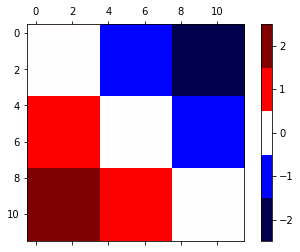

In [15]:
plot_grid(Dij)

In [16]:
Dij

array([[ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0]])

In [17]:
alpha_grid = alphaij(Nx, Ny, order='col')

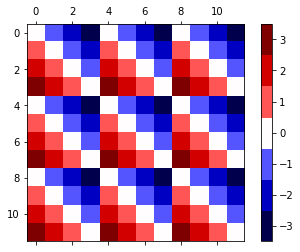

In [18]:
plot_grid(alpha_grid)

In [19]:
alpha_grid

array([[ 0, -1, -2, -3,  0, -1, -2, -3,  0, -1, -2, -3],
       [ 1,  0, -1, -2,  1,  0, -1, -2,  1,  0, -1, -2],
       [ 2,  1,  0, -1,  2,  1,  0, -1,  2,  1,  0, -1],
       [ 3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1,  0],
       [ 0, -1, -2, -3,  0, -1, -2, -3,  0, -1, -2, -3],
       [ 1,  0, -1, -2,  1,  0, -1, -2,  1,  0, -1, -2],
       [ 2,  1,  0, -1,  2,  1,  0, -1,  2,  1,  0, -1],
       [ 3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1,  0],
       [ 0, -1, -2, -3,  0, -1, -2, -3,  0, -1, -2, -3],
       [ 1,  0, -1, -2,  1,  0, -1, -2,  1,  0, -1, -2],
       [ 2,  1,  0, -1,  2,  1,  0, -1,  2,  1,  0, -1],
       [ 3,  2,  1,  0,  3,  2,  1,  0,  3,  2,  1,  0]])

In [20]:
beta_grid = betaij(Nx, Ny, order='col')

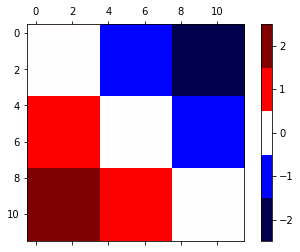

In [21]:
plot_grid(beta_grid)

In [22]:
beta_grid

array([[ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -2, -2, -2, -2],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 2,  2,  2,  2,  1,  1,  1,  1,  0,  0,  0,  0]])

In [23]:
R = np.sqrt((alpha_grid*Dx)**2 + (beta_grid*Dy)**2 + (np.ones((Nx*Ny, Nx*Ny))*Dz)**2)

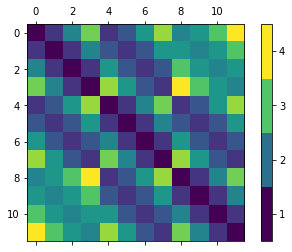

In [24]:
plot_grid(R, cmap='viridis')

#### Plot the simulated row-oriented grids

In [25]:
i, j, Dij = Delta_ij(Nx, Ny, order='row')

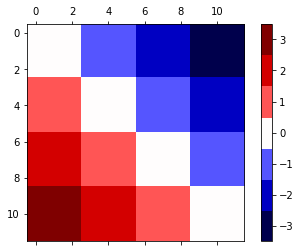

In [26]:
plot_grid(Dij)

In [27]:
Dij

array([[ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0]])

In [28]:
alpha_grid = alphaij(Nx, Ny, order='row')

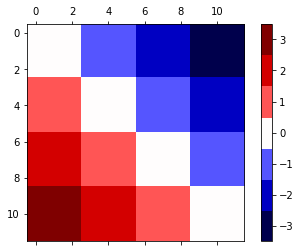

In [29]:
plot_grid(alpha_grid)

In [30]:
alpha_grid

array([[ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 0,  0,  0, -1, -1, -1, -2, -2, -2, -3, -3, -3],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1, -2, -2, -2],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 2,  2,  2,  1,  1,  1,  0,  0,  0, -1, -1, -1],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0],
       [ 3,  3,  3,  2,  2,  2,  1,  1,  1,  0,  0,  0]])

In [31]:
beta_grid = betaij(Nx, Ny, order='row')

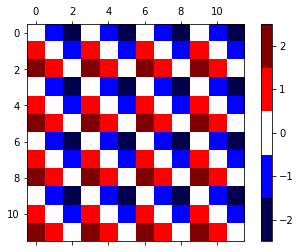

In [32]:
plot_grid(beta_grid)

In [33]:
beta_grid

array([[ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0],
       [ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0],
       [ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0],
       [ 0, -1, -2,  0, -1, -2,  0, -1, -2,  0, -1, -2],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1],
       [ 2,  1,  0,  2,  1,  0,  2,  1,  0,  2,  1,  0]])

In [34]:
R = np.sqrt((alpha_grid*Dx)**2 + (beta_grid*Dy)**2 + (np.ones((Nx*Ny, Nx*Ny))*Dz)**2)

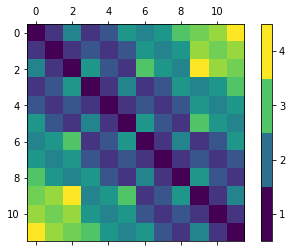

In [35]:
plot_grid(R, cmap='viridis')